In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

* CUSUM ON CHEMICAL PROCESS TEMPERATURE 

In [107]:
values = [3169, 3173, 3162, 3154, 3139, 3145, 3160, 3172, 3175, 3205, 3203, 
3209, 3208, 3211, 3214, 3215, 3209, 3203, 3185, 3187,3192, 3199, 3197, 3193, 
3190, 3183, 3197, 3188, 3183, 3175, 3174, 3171, 3180, 3179, 3175, 3174]

chemical = pd.DataFrame(values, columns=["viscosity"], index=range(1, len(values)+1))
chemical

,viscosity
1,3169
2,3173
3,3162
4,3154
5,3139
6,3145
7,3160
8,3172
9,3175
10,3205


In [108]:
chemical.head()

,viscosity
1,3169
2,3173
3,3162
4,3154
5,3139


### Process extimated standard deviation

In [109]:
std_estimated =chemical.viscosity.std()
print(f'The Estimated process standard deviation is {std_estimated}')

The Estimated process standard deviation is 19.260618592647237


In [110]:
Mu1 = chemical.viscosity.mean()
print(f'The Estimated process standard deviation is {Mu1}')

The Estimated process standard deviation is 3184.6666666666665


### Tabular CUSUM for the process

In [111]:
H = h*std_estimated # Decision Interval
print("The decision Interval is", H)

The decision Interval is 154.27755492710438


In [112]:
# Constant values
h = 8.01 # Decision Parameter
H = h*std_estimated # Decision Interval
K = 0.25 # Reference parameter
Mu0 = 3200 # Process mean

In [113]:
Ci_p = []
Ci_n = []
for i in chemical.index:
    if i == 1:
        Ci_p.append(max(0,chemical.viscosity[i] - (Mu0 + K) ))
        Ci_n.append(max(0,(Mu0 - K)-chemical.viscosity[i] ))
    else:
        temp_ = Ci_p[-1]
        temp_1 = Ci_n[-1]
        Ci_p.append(max(0,chemical.viscosity[i] - (Mu0 + K) + temp_))
        Ci_n.append(max(0,(Mu0 - K)-chemical.viscosity[i] + temp_1))

In [114]:
# Function to genarate value of N
def generate_n(col):
    N_plus = []
    counter = 0
    for i in col.index:
        if col[i] == 0:
            counter = 0
            N_plus.append(counter)
        elif col[i]>0 and i <= len(col):
            counter += 1
            N_plus.append(counter)
    return N_plus

In [115]:
# Updating the dataframe

chemical['Ci_p'] = pd.DataFrame(Ci_p, index=range(1,37))
chemical['N_plus'] = pd.DataFrame(generate_n(chemical.Ci_p),index=range(1,37))

chemical['Ci_n'] = pd.DataFrame(Ci_n, index=range(1,37))
chemical['N_minus'] = pd.DataFrame(generate_n(chemical.Ci_n),index=range(1,37)) 
chemical  


,viscosity,Ci_p,N_plus,Ci_n,N_minus
1,3169,0.00,0,30.75,1
2,3173,0.00,0,57.50,2
3,3162,0.00,0,95.25,3
4,3154,0.00,0,141.00,4
5,3139,0.00,0,201.75,5
6,3145,0.00,0,256.50,6
7,3160,0.00,0,296.25,7
8,3172,0.00,0,324.00,8
9,3175,0.00,0,348.75,9
10,3205,4.75,1,343.50,10


* Conclusion: There is a shoft of the mean at the point 31.
* Explanation: We can see that at N_minus=5,the value of Ci_n=201.75 which is grater that the value of the decision interval, Therefore there is a shift of the mean at the position(36-5=31).

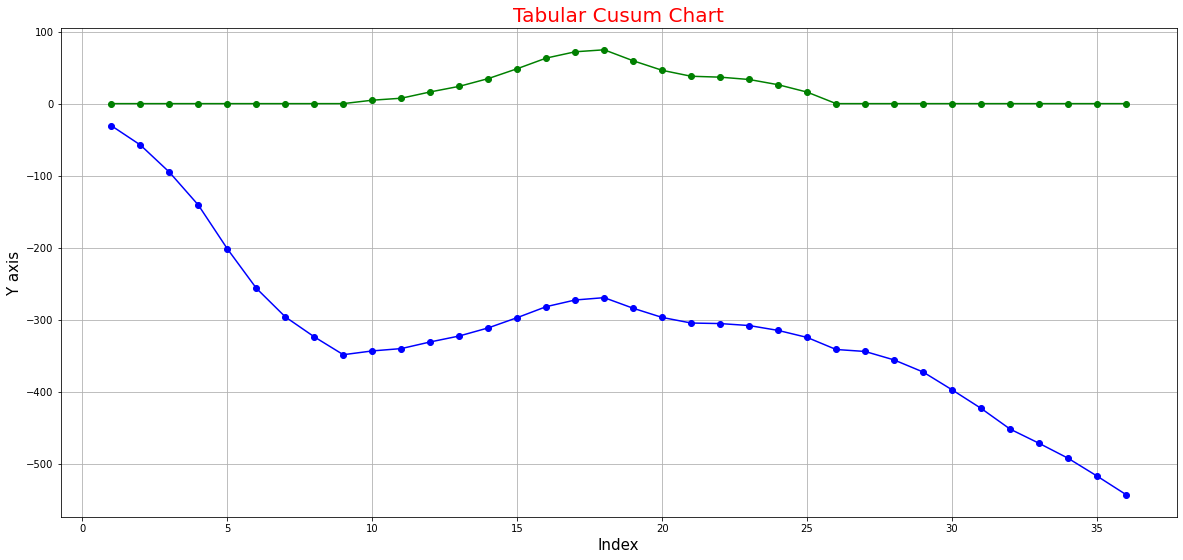

In [118]:
plt.figure(figsize=(20,9))
plt.plot(chemical.index, chemical['Ci_p'], 'go-')
plt.plot(chemical.index,-chemical['Ci_n'], 'bo-')

plt.title('Tabular Cusum Chart', fontsize=20, color='red')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Y axis', fontsize=15)
plt.grid()

* Conclusion: We conclude that taking K=0.25 and h=8.01 there is a shift of the mean at the point 31 more than 1 times the standard deviation.

In [129]:
vel=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\velocity_light .csv")
vel


,measurement,velocity
0,1,850
1,2,1000
2,3,740
3,4,980
4,5,900
5,6,930
6,7,1070
7,8,650
8,9,930
9,10,760


In [130]:
vel.head()


,measurement,velocity
0,1,850
1,2,1000
2,3,740
3,4,980
4,5,900


In [131]:
Mu1 = vel.velocity.mean()
sd = vel.velocity.std()

print('The process means is : {}\nStandard deviation : {}'.format(Mu1, sd))

The process means is : 909.0
Standard deviation : 104.92603911427577


# CUSUM chart with target value 734.5

In [132]:
H = 5*sd # Decision Interval
print("The decision Interval is", H)

The decision Interval is 524.6301955713789


In [133]:
# Constant values
H = 5*sd # Decision Interval
Mu0 = 734.5 # The target mean
K = (abs(Mu0 - Mu1))/2 # Reference parameter

In [134]:
vel1 = vel.copy()

Ci_p = []
Ci_n = []
for i in vel1.index:
    if i == 0:
        Ci_p.append(max(0, vel1.velocity[i] - (Mu0 + K) ))
        Ci_n.append(max(0, (Mu0 - K) - vel1.velocity[i] ))
    else:
        temp_ = Ci_p[-1]
        temp_1 = Ci_n[-1]
        Ci_p.append(max(0, vel1.velocity[i] - (Mu0 + K) + temp_))
        Ci_n.append(max(0, (Mu0 - K) - vel1.velocity[i] + temp_1)) 

In [135]:
# Function to genarate value of N
def generate_n(col):
    N_plus = []
    counter = 0
    for i in col.index:
        if col[i] == 0:
            counter = 0
            N_plus.append(counter)
        elif col[i]>0 and i <= len(col):
            counter += 1
            N_plus.append(counter)
    return N_plus

In [136]:
# Updating the dataframe

vel1['Ci_p'] = pd.DataFrame(Ci_p)
vel1['N_plus'] = pd.DataFrame(generate_n(vel1.Ci_p))

vel1['Ci_n'] = pd.DataFrame(Ci_n)
vel1['N_minus'] = pd.DataFrame(generate_n(vel1.Ci_n))

vel1

,measurement,velocity,Ci_p,N_plus,Ci_n,N_minus
0,1,850,28.25,1,0,0
1,2,1000,206.50,2,0,0
2,3,740,124.75,3,0,0
3,4,980,283.00,4,0,0
4,5,900,361.25,5,0,0
5,6,930,469.50,6,0,0
6,7,1070,717.75,7,0,0
7,8,650,546.00,8,0,0
8,9,930,654.25,9,0,0
9,10,760,592.50,10,0,0


* Conclusion: There is a shift of the mean at the point 31.
* Explanation: We are see that at N_plus=7, yhe value of Ci_p=717.75, which is grater that the value of the decision interval, Therefore there is a shift of the mean at the position(20-7=13).

### Viaulizing the plot

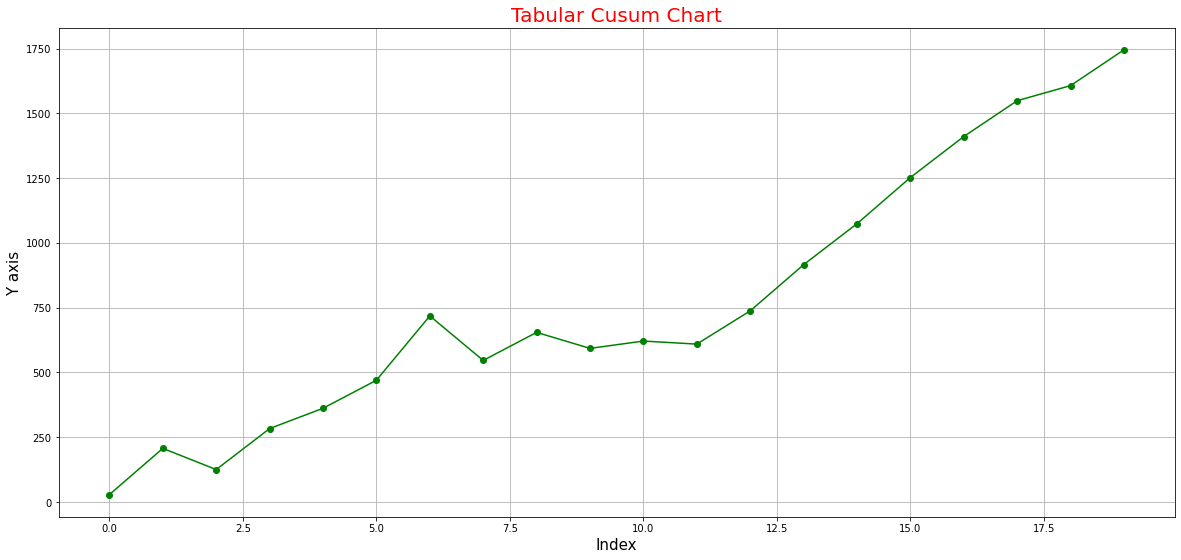

In [138]:
plt.figure(figsize=(20,9))
plt.plot(vel1.index, vel1['Ci_p'], 'go-')
# plt.plot(data1.index, -data1['Ci_n'], 'bo-')

plt.title('Tabular Cusum Chart', fontsize=20, color='red')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Y axis', fontsize=15)
plt.grid()
plt.show()

# EWMA chart with lambda=0.1

In [140]:
import math
# Calculate Zi, UCLi and LCLi for each size value
lam = 0.1 # Value of lambda
l = 2.7 # Value of L
# Function to calculate value of z
def func(List):
    xi = [lam*List[0]+ (1-lam)*Mu1]
    for i in List[1:]: 
        xi.append(lam*i+ (1-lam)*xi[-1])
    return xi

ucl = [(Mu1 + l*sd*math.sqrt((lam/(2-lam))*(1-pow((1-lam),2*i)))) for i in range(0, 21)]
lcl = [(Mu1 - l*sd*math.sqrt((lam/(2-lam))*(1-pow((1-lam),2*i)))) for i in range(0, 21)]

vel['zi'] = pd.DataFrame(func(vel.velocity.values))
vel['ucl'] =  pd.DataFrame(ucl)
vel['lcl'] =  pd.DataFrame(lcl)
vel  

,measurement,velocity,zi,ucl,lcl
0,1,850,903.100000,909.000000,909.000000
1,2,1000,912.790000,937.330031,880.669969
2,3,740,895.511000,947.114158,870.885842
3,4,980,903.959900,953.488973,864.511027
4,5,900,903.563910,958.048938,859.951062
5,6,930,906.207519,961.452715,856.547285
6,7,1070,922.586767,964.055729,853.944271
7,8,650,895.328090,966.077216,851.922784
8,9,930,898.795281,967.663580,850.336420
9,10,760,884.915753,968.917754,849.082246


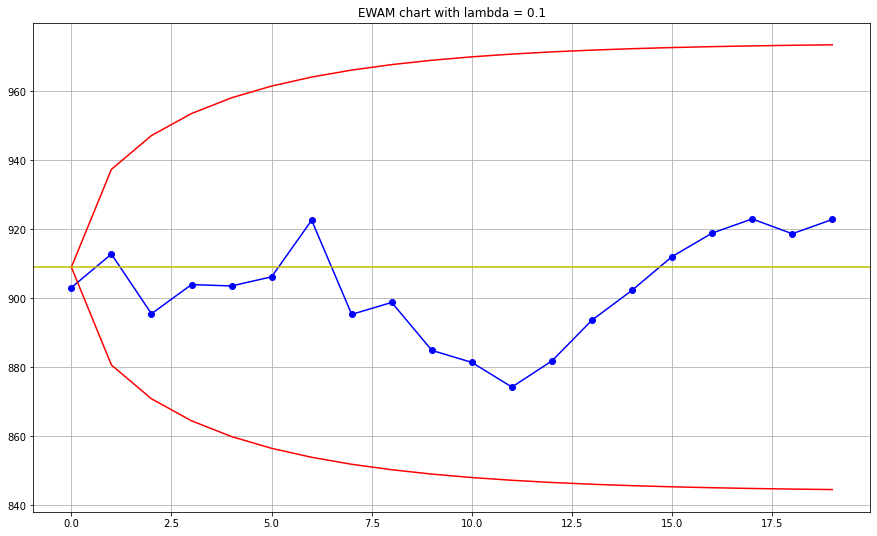

In [144]:
plt.figure(figsize=(15,9))
plt.title('EWAM chart with lambda = 0.1')
plt.plot(vel.index, vel.zi ,'bo-' )
plt.plot(range(0,20),vel.ucl,'r-')
plt.plot(range(0,20),vel.lcl,'r-')
plt.axhline(y=Mu1, color='y', linestyle='-')
plt.grid()

* Conclusion: The process is in control